[View in Colaboratory](https://colab.research.google.com/github/helloqinglan/LearningML/blob/master/1-Helloworld.ipynb)

## TensoFflow的环境安装与配置
TensorfFow是机器学习领域最为熟知的开源库。[TensorFlow官方文档](https://www.tensorflow.org/install/install_windows)描述的安装方法有两种：
- "原生"pip
- Anaconda
虽说官方表示Anaconda版本的TensorFlow由社区维护，没有任何官方支持，但是[Google Developers](https://www.youtube.com/watch?v=cKxRvEZd3Mw) Youtube频道上的新手入门指导里，推荐的还是Anaconda。
Anaconda + Jupyter notebooks
- 修改notebooks工作目录
- 安装机器学习相关的库

使用Google Colaboratory
- 修改Jupyter notebooks配置以支持colaboratory
- 将文件存储到Google Driver
- 将文件分享到Github

In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [2]:
# Sample 1
# 使用决策树来预测对象的类型
# scikit-learn
from sklearn import tree

# 特征集
features = [[140, 1], [130, 1], [150, 0], [170, 0]]

# 标签
labels = [0, 0, 1, 1]

# 训练 (fit means find patterns in data)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

# 预测
print(clf.predict([[160, 0]]))

[1]


各种类型的Classifiers
- Artificial neural network
- Support Vector Machine
决策树是最简单的分类器

In [9]:
# 预测鸢尾花的类型
# scikit-learn库中自带了一些数据, 可以直接拿来使用
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()

print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

# 从数据中移除三项, 用来做训练之后的测试
test_idx = [0, 50, 100]

# training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

# 训练
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)

# 验证预测结果是否正确
print(test_target)
print(clf.predict(test_data))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0
[0 1 2]
[0 1 2]


### 怎样选择特征集
- feature要能够区分不同的标签
- 特征集要足够多，有些特征在一定条件下能够区分标签，但不是所有条件下都有用，所以要有不同类型的特征
- 特征之间应该尽可能的独立，这样他们才能给出更多信息 (avoid redundant features)
- 特征应该容易理解 (easy to be understand)

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

from sklearn import tree
my_classifier = tree.DecisionTreeClassifier()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.96


### Writting our first Classifier
一个随机的分类器

In [13]:
import random

class ScrappyKNN():
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
  
  def predict(self, X_test):
    predictions = []
    for row in X_test:
      label = random.choice(self.y_train)
      predictions.append(label)
    return predictions

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.36


### 优化：使用k-Nearest Neighbors算法实现分类器
算法描述：从特征集中找最近的k个特征，取出现次数最多的标签

In [14]:
from scipy.spatial import distance

def euc(a, b):
  return distance.euclidean(a, b)

class ScrappyKNN():
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
  
  def predict(self, X_test):
    predictions = []
    for row in X_test:
      label = self.closest(row)
      predictions.append(label)
    return predictions
  
  def closest(self, row):
    best_dist = euc(row, self.X_train[0])
    best_index = 0
    for i in range(1, len(self.X_train)):
      dist = euc(row, self.X_train[i])
      if dist < best_dist:
        best_dist = dist
        best_index = i
    return self.y_train[best_index]

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9066666666666666


### TensorFlow for Poets
尤其擅长于做图像识别，属于Deep Learning

### TF Learn
- High level ML library on top of TensorfFow
- similar to scikit-learn

### Inception
- one of Google's best image Classifiers
- open source
- trained on 1.2 million images
- training took 2 weeks

### Retraining
- also known as Transfer Learning
- saves a lot of time
- leverages prior work

### Classifying Handwritten Digits with TF.Learn


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
0.9137


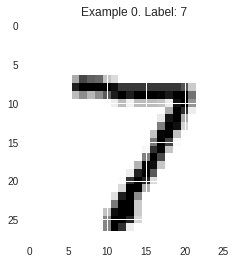

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

# There are 55k examples in train, and 10k in eval. You may wish to limit the size to experiment faster.
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)
    
display(0)

feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

classifier.evaluate(test_data, test_labels)
print(classifier.evaluate(test_data, test_labels)["accuracy"])


### No feature engineering
- we use the raw pixels (28 * 28像素，所以我们有784个特征)
- Classifier does the rest
- Using the flattened representation of the image (means convert from 2D to 1D array)

算法描述：
对于每一个sample来说，784个像素表示784个feature，有10种可能的数值结果(0-9)，对应到10个标签(targets)
也即784个input, 10个output

每个input和10个output都有连接(edge)，连接还有权重值(weight)
这里最重要的就是这个weight

### Weights adjusted by gradient descent (梯度下降)
- Begin with random weight
- Gradually adjust to better values
- This happens inside the fit method

如果我们把计算出来的权重值用图像表示出来
红色表示正向的权重，蓝色表示负向的权重
那么每个点都会有一个数值，当进行预测的时候，将每个像素上的数据，跟权重值结合，看更接近哪一种标签的值